In [2]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../datasets/marketing_sales_data.csv")
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [4]:
data.shape

(572, 5)

In [16]:
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [11]:
data.isnull().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [15]:
data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [17]:
data.isnull().any(axis=1).sum()

np.int64(3)

In [18]:
data = data.dropna(axis=0)

In [21]:
data.isna().any(axis=1).sum()

np.int64(0)

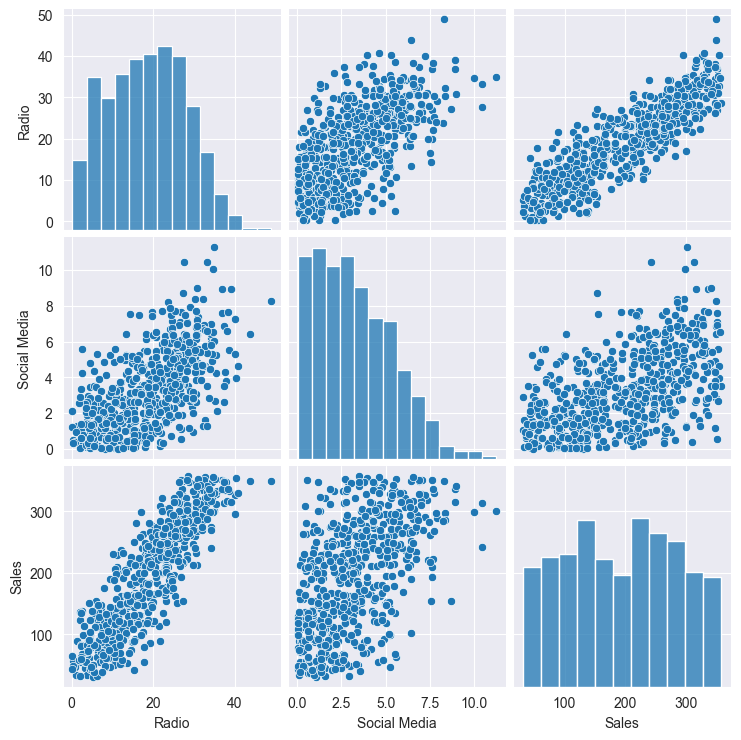

In [27]:
sns.pairplot(data)

In [29]:
ols_data = data[["Radio", "Sales"]]
ols_data.head()

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328


In [30]:
ols_formula = "Sales ~ Radio"

In [31]:
OLS = ols(formula=ols_formula, data= ols_data)
model = OLS.fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          2.07e-176
Time:                        00:16:11   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

intercept is equal to 41.5326. and the slope is equal to 8.1733

<Axes: xlabel='Radio', ylabel='Sales'>

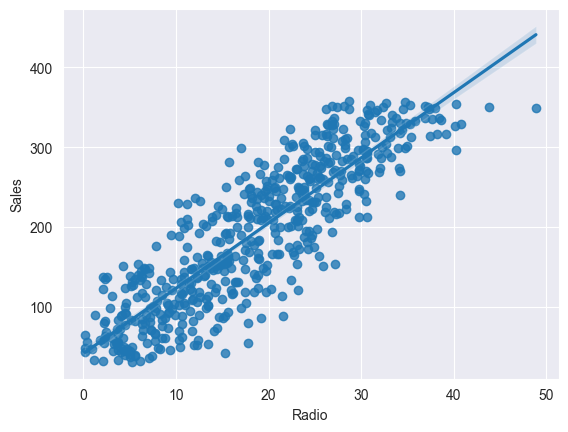

In [34]:
sns.regplot(x="Radio", y="Sales", data=ols_data)

In [35]:
residuals = model.resid

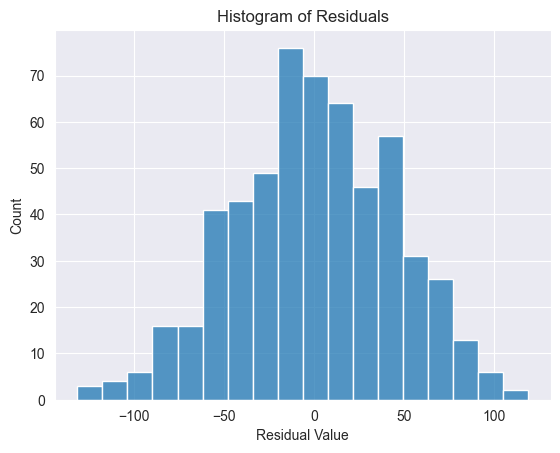

In [36]:
#checking the normality assumption
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

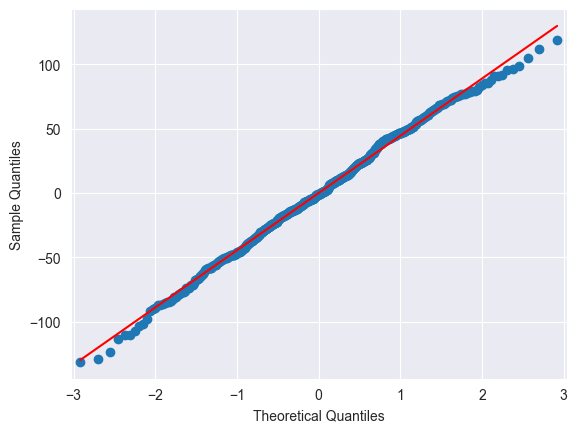

In [37]:
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

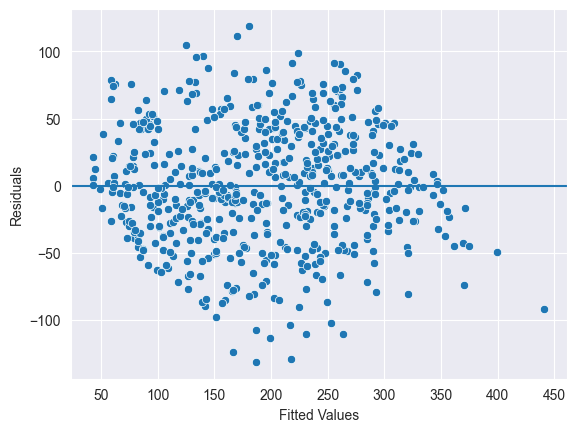

In [39]:
#checking the independent observation and homoscedasticity
fitted_values = model.predict(ols_data.Radio)

fig = sns.scatterplot(x=fitted_values, y=residuals)

# adding reference line at residuals = 0
fig.axhline(0)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

plt.show()